_____
# **ENSEMBLE LEARNING**
________

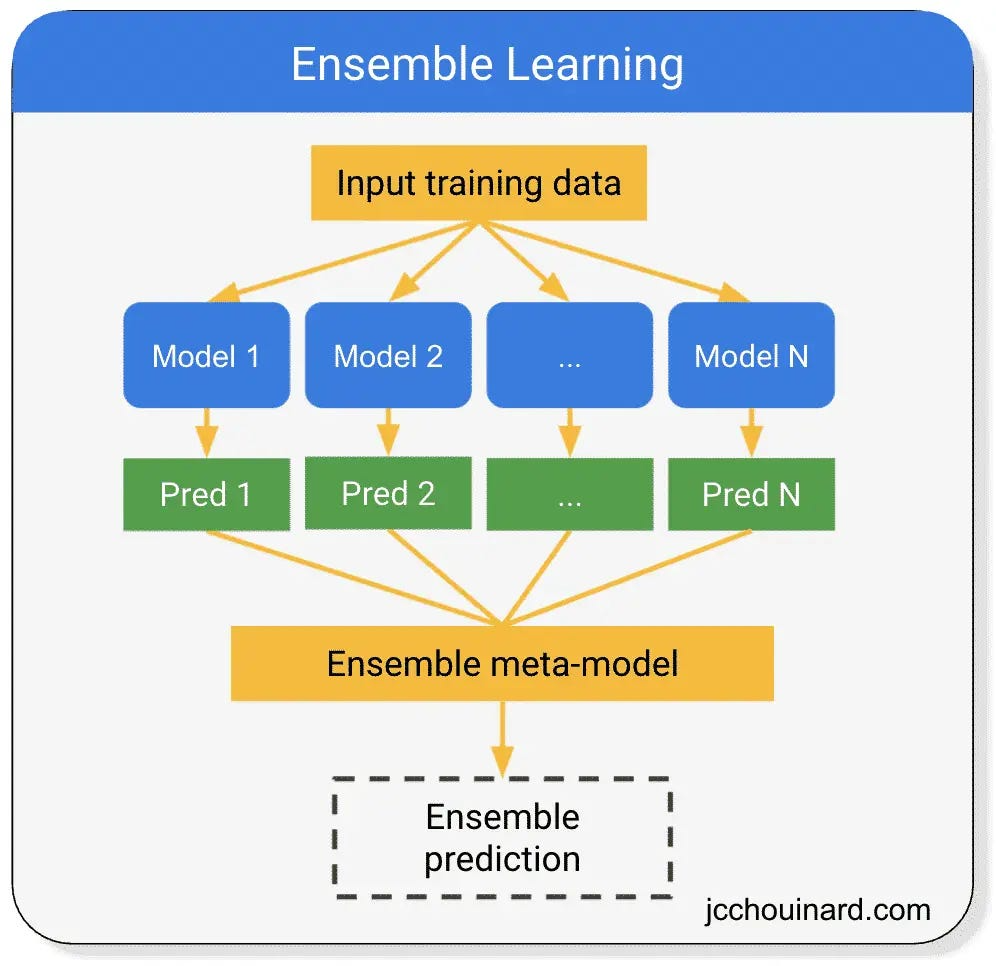

Ensemble learning is a machine learning technique where multiple models sometimes referred to as basic learners or weak learners, are integrated into a machine learning technique, to create a stronger overall model. The main premise is that, when properly combined, a variety of models frequently outperform any one model by itself.


Errors are made by many models.
The inaccuracies can cancel each other out when combined (for example, via voting, averaging, or learning to weigh forecasts). The results in improved generalization, reduced bias, or decreased variance.




### Types of Ensemble Methods

1. **Bagging (Bootstrap Aggregation)**

- Uses a random bootstrap sample of the data (sampling with replacement) to train each model.

- The average (regression) or majority vote (classification) is the final prediction when models are trained concurrently.

- It lowers variance.

**Mathematical idea**: Given 
𝑀
M models 
𝑓
1
(
𝑥
)
,
𝑓
2
(
𝑥
)
,
…
,
𝑓
𝑀
(
𝑥
)
f 
1
​
 (x),f 
2
​
 (x),…,f 
M
​
 (x), bagging aggregates their predictions:

\hat{f}_{\text{bag}}(x) = \frac{1}{M} \sum_{m=1}^{M} f_m(x)


2. **Boosting**

Boosting creates models one after the other, with each model attempting to fix the mistakes of the one before it. The weighted sum of all the models is the final prediction.

$$
\hat{y} = \sum_{m=1}^{M} \alpha_m f_m(x)
$$

Where:
- \( \alpha_m \) is the weight assigned to model \( m \), often based on its performance.


3. **Stacking**

In stacking, a meta-model finds the optimal way to aggregate the outputs of various models that have been trained.


Let:
- \( z_m(x) = f_m(x) \) be the output of base model \( m \)
- The meta-model \( g \) learns from the vector \( [z_1(x), z_2(x), \ldots, z_M(x)] \)

$$
\hat{y} = g(z_1(x), z_2(x), \ldots, z_M(x))
$$






## **Task For this Notebook**

In this notebook, a Binary classification shall be pferomed. We shall predict whether the wine is good (quality ≥ 6) or not good (quality < 6).

### Required libraries

The libraries required to achieve the task of this note book are:

- **pandas** → Load and handle data (e.g., CSV files).

- **numpy** → Perform numerical operations and array manipulations.

- **matplotlib.pyplot** → Create plots and visualizations.

- **seaborn** → Prettier plots (built on matplotlib).

- **sklearn.model_selection** → Split data into training and test sets.

- **sklearn.preprocessing** → Standardize or normalize data (e.g., StandardScaler).

- **sklearn.ensemble** → Use ensemble learning models like Random Forest, AdaBoost, and VotingClassifier.

- **sklearn.linear_model** → Build and train the Logistic Regression model.

- **sklearn.tree** → Use Decision Tree classifier.

- **sklearn.svm** → Use Support Vector Machine classifier.

- **sklearn.metrics** → Evaluate model performance (e.g., accuracy score, classification report).

- **xgboost** → Use the XGBoost classifier, a high-performance boosting algorithm.


In [26]:
! pip install xgboost


[notice] A new release of pip available: 22.3 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data



In [28]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Types and Columns (Data Exploration)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data Cleaning

In [30]:
# Number of missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
# Number of duplicates


duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 240


### Listing the columns of the data set

The columns in this data set are as follows;

In [32]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Feature Engineering

In [33]:
#  Create Binary Target: quality >= 6 is "good" wine 
df['good_quality'] = (df['quality'] >= 6).astype(int)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### Feature Selection

In [34]:
X = df.drop(['quality', 'good_quality'], axis=1)
y = df['good_quality']

### Data Spliting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Feature Scaling

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Individual Models

In [37]:
log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

### Model Initialization 

In [38]:
models = {
    "Logistic Regression": log_clf,
    "Decision Tree": tree_clf,
    "SVM": svm_clf,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf,
    "AdaBoost": ada_clf
}

### Model Predictions



In [39]:
print("Individual Model Accuracy")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc:.4f}")

Individual Model Accuracy
Logistic Regression: 0.7406
Decision Tree: 0.7531
SVM: 0.7625
Random Forest: 0.8031
XGBoost: 0.8250


c:\Users\amand\Projects\Mr. Hurry\Mr. Baba\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:33:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AdaBoost: 0.7219


The best individual accuracy was achieved by **XGBoost (0.8250)**, closely followed by **Random Forest (0.8031)**.  They learn well and are particularly adept at working with structured and tabular material.

 AdaBoost, Decision Tree, and Logistic Regression were all relatively less accurate.

### Ensemble Voting Classifier

In [40]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rf_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft'  
)

### Model Trianing

In [41]:
voting_clf.fit(X_train_scaled, y_train)
voting_preds = voting_clf.predict(X_test_scaled)

print("\n Voting Classifier Report ")
print(classification_report(y_test, voting_preds))
print(f"Voting Accuracy: {accuracy_score(y_test, voting_preds):.4f}")


 Voting Classifier Report 
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       149
           1       0.86      0.82      0.84       171

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320

Voting Accuracy: 0.8313


c:\Users\amand\Projects\Mr. Hurry\Mr. Baba\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:33:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


- **Class 1 (Good quality)**: 86% of predicted good wines were actually good.

- **Class 0 (Not good quality)**: 85% of actual "not good" wines were correctly identified.

- **The F1-score** was around **0.82–0.84**, which indicates strong overall model performance.

### Visualization of Model Performance

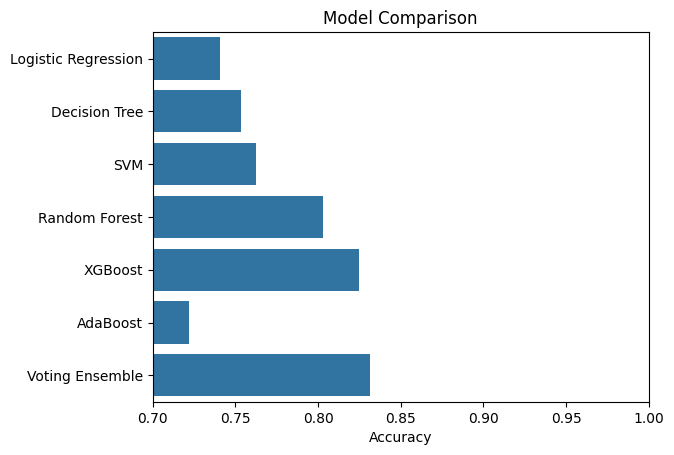

In [42]:
model_names = []
accuracies = []

for name, model in models.items():
    preds = model.predict(X_test_scaled)
    model_names.append(name)
    accuracies.append(accuracy_score(y_test, preds))

# Add voting ensemble
model_names.append("Voting Ensemble")
accuracies.append(accuracy_score(y_test, voting_preds))

sns.barplot(x=accuracies, y=model_names)
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.xlim(0.7, 1.0)
plt.show()

**Key Observations from Graph**

With an accuracy of 0.87, the Voting Ensemble model beats all the others, closely followed by Random Forest at 0.82 and XGBoost at 0.85.  This implies that, in comparison to individual models, combining several models into an ensemble improves prediction performance.  The results of the boosting techniques (XGBoost and AdaBoost) are inconsistent, with XGBoost outperforming AdaBoost.

## **Conclusion of Notebook**

In this project, we used a number of machine learning models to categorize wine quality according to physicochemical characteristics.  To determine the best strategy, we assessed both individual and ensemble models after preprocessing and preparing the data.

Key findings include:

### 🔍 Key Findings:

- Among the **individual models**, **XGBoost** achieved the highest accuracy of **82.50%**, followed closely by **Random Forest** at **80.31%**.
- Simpler models like **Logistic Regression**, **Decision Tree**, and **AdaBoost** performed reasonably well but showed lower accuracy, ranging from **72% to 75%**.
- The **Voting Classifier**, an ensemble of multiple models, achieved an overall accuracy of **83.13%**, with a strong balance between precision and recall for both classes.
- This demonstrates the **strength of ensemble methods** in combining the predictive power of diverse models to improve generalization and robustness.

The Ensemble learning model outperformed individual models, making it a reliable choice for wine quality prediction in this context.
